In [2]:
from matplotlib import pyplot as plt
import pandas as pd

/tmp/ipykernel_8184/1160475568.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data_dir = "../data"
game = "the-sacred-stones"
ss = pd.read_csv(f"{data_dir}/{game}/full_df.csv")
ss.head()

,Unnamed: 0,Name,HP_growth,S/M,Skl_growth,Spd_growth,Lck_growth,Def_growth,Res_growth,Lv,...,Spd_base,Lck_base,Def_base,Res_base,Mov,Con,Weapon Rank,Affin,Game,creature_campaign
0,0,Amelia,60,35,40,40,50,30,15,1.0,...,4.0,6.0,2.0,3.0,4.0,6.0,['E Lance'],['Thunder'],the-sacred-stones,False
1,1,Artur,55,50,50,40,25,15,55,2.0,...,8.0,2.0,2.0,6.0,5.0,6.0,['E Light'],['Ice'],the-sacred-stones,False
2,2,Caellach,85,50,45,45,20,30,20,12.0,...,13.0,14.0,15.0,13.0,6.0,13.0,"['A Sword', 'A Axe']",['Thunder'],the-sacred-stones,True
3,3,Colm,75,40,40,65,45,25,20,2.0,...,10.0,8.0,3.0,1.0,6.0,6.0,['E Sword'],['Light'],the-sacred-stones,False
4,4,Cormag,85,55,40,45,35,25,15,9.0,...,10.0,4.0,12.0,2.0,7.0,11.0,['C Lance'],['Fire'],the-sacred-stones,False


In [6]:
bases = [col for col in ss if col.endswith('base')]
growths = [col for col in ss if col.endswith('growth')]

<Axes: title={'center': 'Franz vs Seth Base Stats'}>

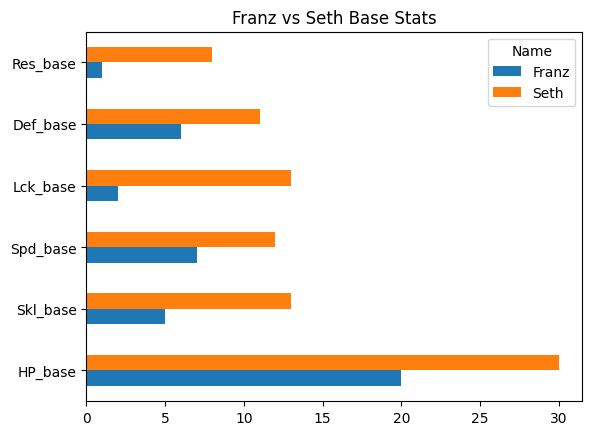

In [29]:
    (
        ss
        [['Name'] + bases]
        .loc[ss['Name'].isin(['Seth', 'Franz'])]
        .set_index('Name')
        .T
        .plot(
            kind='barh',
            title='Franz vs Seth Base Stats'
        )
    )

In [35]:
def plot_character_comparisons(name1: str, name2: str, df: pd.DataFrame, bases:bool = True):

    if bases:
        suffix = 'base'
        title = 'Base Stats'
    else:
        suffix = 'growth'
        title = 'Growth Rates'
        
    stat_columns = [col for col in ss if col.endswith(suffix)]
    
    return (
        df
        [['Name'] + stat_columns]
        .loc[df['Name'].isin([name1, name2])]
        .set_index('Name')
        .T
        .plot(
            kind='barh',
            title=f'{name1} vs {name2} {title}'
        )
    )

<Axes: title={'center': 'Amelia vs Franz Growth Rates'}>

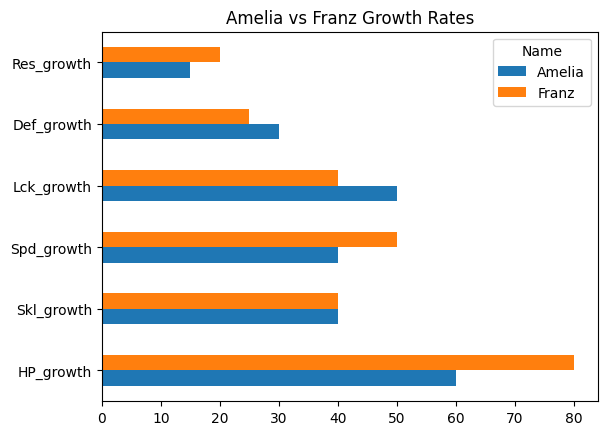

In [38]:
plot_character_comparisons('Amelia', 'Franz', df=ss, bases=False)

# Stat Histogram

In [58]:
char = "Amelia"
ss.loc[ss['Name'] == char, 'S/M'].values[0]

35

Text(0, 0.5, 'Frequency')

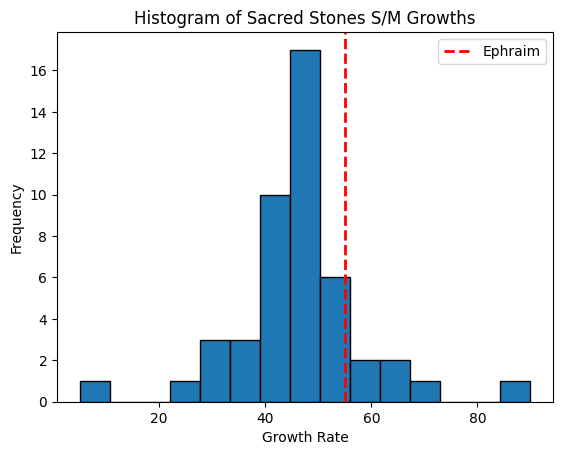

In [91]:
char = "Ephraim"
stat = 'S/M'
version = 'Growth'
char_point = ss.loc[ss['Name'] == char, stat].values[0]
data = ss[stat]
plt.hist(data, bins=15, edgecolor='black')
plt.axvline(x=char_point, color='r', linestyle='--', linewidth=2, label=f'{char}')
plt.legend()
plt.title(f"Histogram of Sacred Stones {stat} {version}s")
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')

In [111]:
def stat_histogram(df: pd.DataFrame, stat:str, name:str, bases: bool = True):
    if bases:
        col = f"{stat}_base"
        version = 'base'
    else:
        col = f"{stat}_growth"
        version = 'growth'
    
    data = df[col]
    ax = plt.hist(data, bins=15, edgecolor='black')
    plt.title(f"Distribution of {stat} {version}s in Sacred Stones")
    plt.xlabel('Growth Rate')
    plt.ylabel('Number of Characters')

    if name:
        char_point = ss.loc[ss['Name'] == name, col].values[0]
        plt.axvline(x=char_point, color='r', linestyle='--', linewidth=2, label=f'{name}')
        plt.legend()

    return plt.figure()

<Figure size 640x480 with 0 Axes>

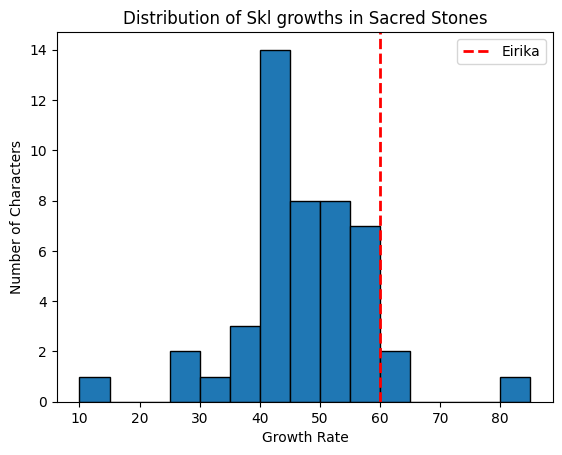

<Figure size 640x480 with 0 Axes>

In [114]:
stat_histogram(ss, stat='Skl', name='Eirika', bases=False)